# Agenda

1. Data types for dates and times
2. Reading datetime info from CSV files
3. The `dt` accessor
4. Creating and working with timedeltas
5. Sorting and grouping by datetime values
6. Indexing with datetimes
7. Resampling

# Data types and concepts

When we talk about "time," we really mean two different things. 

- A single point in time -- a unique combination of year, month, day, hour, minute, second, and as finely grained as you want to get. Examples are: Birth day/time, death day/time, when a meeting starts, when you graduated from college. We can pinpoint a particular time when that happened. This is kept in a data structure known as a `datetime` or (in some systems) as a `timestamp`.
- The time that something takes up. This is the difference between two `datetime` values. Examples: How long someone lived. How long a meeting went. How long someone took to graduate from college. This is known as a `timedelta` or an `interval`. This is measured in hours, minutes, and seconds, but it isn't anchored to any particular hour, minute, second, etc. 

You can then, with these two ideas, do some simple math:
- `datetime` - `datetime` = `timedelta`
- `datetime` + `timedelta` = `datetime`

Pandas can handle both of these.

In [1]:
import pandas as pd

filename = 'taxi.csv'

# create a data frame (2D data structure, sort of like an Excel spreadsheet)
# based on a CSV file, in filename
df = pd.read_csv(filename)

In [2]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [3]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [4]:
# run pd.to_datetime on a column of text that's in a datetime format
pd.to_datetime(df['tpep_dropoff_datetime'])

0      2015-06-02 11:47:52
1      2015-06-02 11:27:56
2      2015-06-02 11:30:30
3      2015-06-02 11:39:02
4      2015-06-02 11:32:49
               ...        
9994   2015-06-01 00:24:18
9995   2015-06-01 00:28:16
9996   2015-06-01 00:37:25
9997   2015-06-01 00:19:10
9998   2015-06-01 00:36:33
Name: tpep_dropoff_datetime, Length: 9999, dtype: datetime64[ns]

In [5]:
# let's assign the output back to the column itself
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [6]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [8]:
# I'd like to get the datetime dtype set automatically (or close to it) when I read
# my CSV file into memory

df = pd.read_csv(filename, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [9]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [29]:
# if you want to live on the bleeding edge, you can use PyArrow
# instead of Pandas to read your CSV file
df = pd.read_csv(filename, engine='pyarrow')

In [11]:
df.dtypes

VendorID                         int64
tpep_pickup_datetime     datetime64[s]
tpep_dropoff_datetime    datetime64[s]
passenger_count                  int64
trip_distance                  float64
pickup_longitude               float64
pickup_latitude                float64
RateCodeID                       int64
store_and_fwd_flag              object
dropoff_longitude              float64
dropoff_latitude               float64
payment_type                     int64
fare_amount                    float64
extra                          float64
mta_tax                        float64
tip_amount                     float64
tolls_amount                   float64
improvement_surcharge          float64
total_amount                   float64
dtype: object

In [12]:
# how can I get the data out?
# we'll use the .dt accessor in order to retrieve it

df['tpep_pickup_datetime'].dt

In [21]:
df['tpep_pickup_datetime'].dt.day_name()

0       Tuesday
1       Tuesday
2       Tuesday
3       Tuesday
4       Tuesday
         ...   
9994     Monday
9995     Monday
9996     Monday
9997     Monday
9998     Monday
Name: tpep_pickup_datetime, Length: 9999, dtype: object

In [23]:
# in this data set, how frequently do we see each hour?

df['tpep_pickup_datetime'].dt.hour.value_counts()

tpep_pickup_datetime
11    4396
15    2536
0     2439
16     628
Name: count, dtype: int64

In [24]:
df['tpep_pickup_datetime'].dt.year.value_counts()

tpep_pickup_datetime
2015    9999
Name: count, dtype: int64

In [25]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [27]:
# mask index to find particular days, times, etc.

# let's find all of the data that took place at 11 a.m.

df.loc[df['tpep_pickup_datetime'].dt.hour == 11]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,2,2015-06-02 11:33:35,2015-06-02 11:42:16,1,0.73,-73.963364,40.768478,1,N,-73.954063,40.766628,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80
5092,2,2015-06-02 11:33:35,2015-06-02 11:38:53,1,0.96,-73.988922,40.730801,1,N,-73.983528,40.741451,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
5093,1,2015-06-02 11:33:36,2015-06-02 11:52:32,2,3.50,-73.998528,40.764137,1,N,-73.958649,40.783257,1,16.0,0.0,0.5,2.00,0.0,0.3,18.80
5130,2,2015-06-02 11:33:35,2015-06-02 11:55:02,5,2.14,-73.953568,40.785400,1,N,-73.971428,40.757950,2,14.0,0.0,0.5,0.00,0.0,0.3,14.80


In [44]:
# time deltas -- what about those?
# we can create a new series of timedeltas by performing some datetime math

df['trip_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_time']

0      0 days 00:28:23
1      0 days 00:08:26
2      0 days 00:10:59
3      0 days 00:19:31
4      0 days 00:13:17
             ...      
9994   0 days 00:11:19
9995   0 days 00:15:17
9996   0 days 00:24:25
9997   0 days 00:06:08
9998   0 days 00:23:29
Name: trip_time, Length: 9999, dtype: timedelta64[s]

In [45]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80,0 days 00:28:23
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30,0 days 00:08:26
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00,0 days 00:10:59
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16,0 days 00:19:31
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0 days 00:13:17


In [48]:
# now I can perform some calculations and comparisons with trip_time
# If I use a string, Pandas will automatically convert that string to a timedelta, and compare

df.loc[df['trip_time'] > '1 hour']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
7,1,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,-73.863075,40.769253,1,N,-73.986710,40.761307,1,52.5,0.0,0.5,15.00,5.54,0.3,73.84,0 days 01:17:11
88,2,2015-06-02 11:20:37,2015-06-02 12:35:21,2,23.76,-73.791214,40.645409,1,N,-74.006966,40.724930,1,72.5,0.0,0.5,8.95,11.75,0.3,94.00,0 days 01:14:44
126,2,2015-06-02 11:21:03,2015-06-03 00:00:00,3,1.06,-73.994919,40.732445,1,N,-73.993980,40.743397,1,8.5,0.0,0.5,1.86,0.00,0.3,11.16,0 days 12:38:57
174,2,2015-06-02 11:21:42,2015-06-02 12:22:51,1,6.65,-73.999046,40.758011,1,N,-74.010910,40.730480,1,37.5,0.0,0.5,7.66,0.00,0.3,45.96,0 days 01:01:09
246,1,2015-06-02 11:19:46,2015-06-02 12:26:33,1,0.00,-73.983200,40.766949,1,N,-73.990410,40.766872,2,2.5,0.0,0.5,0.00,0.00,0.3,3.30,0 days 01:06:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,1,2015-06-04 15:23:01,2015-06-04 16:30:03,1,26.60,-73.789688,40.643726,4,N,-73.853539,40.943649,2,90.5,0.0,0.5,0.00,5.54,0.3,96.84,0 days 01:07:02
8042,2,2015-06-06 16:53:20,2015-06-06 17:54:20,1,17.98,-73.781754,40.644711,2,N,-73.991043,40.749802,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,0 days 01:01:00
8171,2,2015-06-06 16:53:33,2015-06-06 18:01:48,1,18.01,-73.781830,40.644897,2,N,-73.996437,40.756786,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,0 days 01:08:15
8201,2,2015-06-06 16:53:56,2015-06-06 17:54:22,1,17.36,-73.790520,40.646461,2,N,-73.969048,40.763062,1,52.0,0.0,0.5,10.66,5.54,0.3,69.00,0 days 01:00:26


In [49]:
df.loc[df['trip_time'] > '12 hours']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
126,2,2015-06-02 11:21:03,2015-06-03,3,1.06,-73.994919,40.732445,1,N,-73.99398,40.743397,1,8.5,0.0,0.5,1.86,0.0,0.3,11.16,0 days 12:38:57


In [55]:
# how much, on average, did people pay for taxi rides that were < 1 minute long?

(
    df
    .loc[
        df['trip_time'] < '1 minute'  # row selector
        ,
        ['trip_distance', 'total_amount']]
    .mean()
)

trip_distance     1.338690
total_amount     31.938929
dtype: float64

In [56]:
(
    df
    .loc[
        df['trip_time'] < '1 minute'  # row selector
        ,
        ['trip_distance', 'total_amount']]
    .describe()
)

,trip_distance,total_amount
count,84.000000,84.000000
mean,1.338690,31.938929
std,5.557065,43.045758
min,0.000000,-3.300000
25%,0.000000,3.800000
50%,0.000000,6.300000
75%,0.112500,60.655000
max,37.200000,210.140000


In [57]:
!head taxi.csv

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954429626464844,40.764141082763672,1,N,-73.974754333496094,40.754093170166016,2,17,0,0.5,0,0,0.3,17.8
2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,.46,-73.971443176269531,40.758941650390625,1,N,-73.978538513183594,40.761909484863281,1,6.5,0,0.5,1,0,0.3,8.3
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,.87,-73.978111267089844,40.738433837890625,1,N,-73.990272521972656,40.745437622070313,1,8,0,0.5,2.2,0,0.3,11
2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892333984375,40.773529052734375,1,N,-73.971527099609375,40.760330200195312,1,13.5,0,0.5,2.86,0,0.3,17.16
1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979087829589844,40.776771545410156,1,N,-73.982

In [59]:
df['tpep_pickup_datetime'].dt.tz_localize('America/New_York')

0      2015-06-02 11:19:29-04:00
1      2015-06-02 11:19:30-04:00
2      2015-06-02 11:19:31-04:00
3      2015-06-02 11:19:31-04:00
4      2015-06-02 11:19:32-04:00
                  ...           
9994   2015-06-01 00:12:59-04:00
9995   2015-06-01 00:12:59-04:00
9996   2015-06-01 00:13:00-04:00
9997   2015-06-01 00:13:02-04:00
9998   2015-06-01 00:13:04-04:00
Name: tpep_pickup_datetime, Length: 9999, dtype: datetime64[s, America/New_York]

In [61]:
df['tpep_pickup_datetime'].dt.tz_localize('America/New_York').tz_convert('America/Los_Angeles')

TypeError: index is not a valid DatetimeIndex or PeriodIndex

In [62]:
# we can sort by date/time

df.sort_values('tpep_pickup_datetime')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
3987,1,2015-06-01 00:00:00,2015-06-01 00:06:12,1,1.00,-73.988739,40.756832,1,N,-73.974701,40.757038,2,6.0,0.5,0.5,0.00,0.00,0.3,7.30,0 days 00:06:12
4103,2,2015-06-01 00:00:00,2015-06-01 00:00:00,1,0.90,-73.984428,40.737209,1,N,-73.979935,40.749088,1,11.5,1.0,0.5,2.00,0.00,0.3,15.30,0 days 00:00:00
4063,2,2015-06-01 00:00:00,2015-06-01 00:00:00,2,1.40,-73.987160,40.738972,1,N,-73.976288,40.755573,2,11.5,0.0,0.5,0.00,0.00,0.3,12.30,0 days 00:00:00
4159,2,2015-06-01 00:00:01,2015-06-01 00:11:29,1,7.41,-73.874634,40.774082,1,N,-73.944809,40.779282,1,21.0,0.5,0.5,5.57,5.54,0.3,33.41,0 days 00:11:28
4025,2,2015-06-01 00:00:01,2015-06-01 00:24:48,1,8.15,-74.006844,40.730572,1,N,-73.946342,40.811508,1,26.5,0.5,0.5,2.50,0.00,0.3,30.30,0 days 00:24:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,1,2015-06-06 16:53:56,2015-06-06 17:00:40,1,1.20,-73.992592,40.730629,1,N,-73.998161,40.717072,1,6.5,0.0,0.5,2.19,0.00,0.3,9.49,0 days 00:06:44
8202,2,2015-06-06 16:53:56,2015-06-06 16:56:18,1,0.58,-73.949013,40.788616,1,N,-73.952942,40.781727,1,4.0,0.0,0.5,0.95,0.00,0.3,5.75,0 days 00:02:22
8201,2,2015-06-06 16:53:56,2015-06-06 17:54:22,1,17.36,-73.790520,40.646461,2,N,-73.969048,40.763062,1,52.0,0.0,0.5,10.66,5.54,0.3,69.00,0 days 01:00:26
8087,2,2015-06-06 16:53:56,2015-06-06 16:55:51,1,0.76,-73.977509,40.784252,1,N,-73.970848,40.793365,2,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0 days 00:01:55


In [63]:
df.sort_values('tpep_pickup_datetime', ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
8164,1,2015-06-06 16:53:57,2015-06-06 16:58:39,1,0.50,-73.968719,40.764427,1,N,-73.965042,40.759476,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,0 days 00:04:42
8201,2,2015-06-06 16:53:56,2015-06-06 17:54:22,1,17.36,-73.790520,40.646461,2,N,-73.969048,40.763062,1,52.0,0.0,0.5,10.66,5.54,0.3,69.00,0 days 01:00:26
8125,2,2015-06-06 16:53:56,2015-06-06 17:02:49,1,1.31,-73.949532,40.776760,1,N,-73.962936,40.770599,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80,0 days 00:08:53
8126,2,2015-06-06 16:53:56,2015-06-06 17:02:42,6,1.36,-73.989304,40.773174,1,N,-73.972092,40.763237,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96,0 days 00:08:46
8088,1,2015-06-06 16:53:56,2015-06-06 17:15:40,1,3.20,-73.971924,40.743896,1,N,-73.957809,40.782368,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,0 days 00:21:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,1,2015-06-01 00:00:01,2015-06-01 00:08:26,3,1.20,-73.981827,40.770767,1,N,-73.994957,40.764378,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80,0 days 00:08:25
4025,2,2015-06-01 00:00:01,2015-06-01 00:24:48,1,8.15,-74.006844,40.730572,1,N,-73.946342,40.811508,1,26.5,0.5,0.5,2.50,0.00,0.3,30.30,0 days 00:24:47
3987,1,2015-06-01 00:00:00,2015-06-01 00:06:12,1,1.00,-73.988739,40.756832,1,N,-73.974701,40.757038,2,6.0,0.5,0.5,0.00,0.00,0.3,7.30,0 days 00:06:12
4063,2,2015-06-01 00:00:00,2015-06-01 00:00:00,2,1.40,-73.987160,40.738972,1,N,-73.976288,40.755573,2,11.5,0.0,0.5,0.00,0.00,0.3,12.30,0 days 00:00:00


In [67]:
# grouping on datetime 

# I want to find out how far people went per hour 

df.loc[df['tpep_pickup_datetime'].dt.hour == 0, 'trip_distance'].mean()

4.312808528085281

In [68]:
df.loc[df['tpep_pickup_datetime'].dt.hour == 11, 'trip_distance'].mean()

2.6611988171064604

In [69]:
# I want to do this for *every* hour in the system

df.groupby(df['tpep_pickup_datetime'].dt.hour)['trip_distance'].mean()

tpep_pickup_datetime
0     4.312809
11    2.661199
15    2.986285
16    2.852166
Name: trip_distance, dtype: float64

In [70]:
df.groupby(df['tpep_pickup_datetime'].dt.day_of_week)['trip_distance'].mean()

tpep_pickup_datetime
0    4.312809
1    2.661199
3    2.986285
5    2.852166
Name: trip_distance, dtype: float64

In [72]:
# groupby multiple elements
df.groupby([df['tpep_pickup_datetime'].dt.day_of_week,
            df['tpep_pickup_datetime'].dt.minute])['trip_distance'].mean()

tpep_pickup_datetime  tpep_pickup_datetime
0                     0                       4.381589
                      1                       4.277704
                      2                       4.041907
                      3                       4.536489
                      4                       4.660118
                      5                       4.393082
                      6                       4.641471
                      7                       4.439505
                      8                       3.997288
                      9                       4.481159
                      10                      4.250000
                      11                      4.197670
                      12                      3.941948
                      13                      4.102202
                      15                      0.800000
1                     19                      2.324247
                      20                      2.596300
                      

In [73]:
# we can then turn one of the multi-index parts into columns

(
    df.groupby([df['tpep_pickup_datetime'].dt.day_of_week,
                df['tpep_pickup_datetime'].dt.minute])['trip_distance']
    .mean()
    .unstack(level=0)  # take one part of the multi-index, and make it into columns
)

tpep_pickup_datetime,0,1,3,5
tpep_pickup_datetime,,,,
0,4.381589,NaN,NaN,NaN
1,4.277704,NaN,NaN,NaN
2,4.041907,NaN,NaN,NaN
3,4.536489,NaN,NaN,NaN
4,4.660118,NaN,NaN,NaN
5,4.393082,NaN,NaN,NaN
6,4.641471,NaN,NaN,NaN
7,4.439505,NaN,NaN,NaN
8,3.997288,NaN,NaN,NaN


In [74]:
# can we use our datetime info as an index on our data frame?

df = df.set_index('tpep_pickup_datetime')

In [75]:
df.head()

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80,0 days 00:28:23
2015-06-02 11:19:30,2,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30,0 days 00:08:26
2015-06-02 11:19:31,2,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00,0 days 00:10:59
2015-06-02 11:19:31,2,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16,0 days 00:19:31
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0 days 00:13:17


In [76]:
# can I retrieve based on this value?

df.loc['2015-06-02 11:19:29']

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.0,0.0,0.3,17.8,0 days 00:28:23
2015-06-02 11:19:29,1,2015-06-02 11:26:06,1,1.10,-74.005524,40.725693,1,N,-73.992691,40.732224,2,6.5,0.0,0.5,0.0,0.0,0.3,7.3,0 days 00:06:37
2015-06-02 11:19:29,1,2015-06-02 11:22:47,1,0.40,-73.975044,40.790031,1,N,-73.975517,40.787106,2,4.0,0.0,0.5,0.0,0.0,0.3,4.8,0 days 00:03:18


In [77]:
# If I remove some of the finer-grained time measurements,
# those become wildcards

df.loc['2015-06-02 11:19']

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80,0 days 00:28:23
2015-06-02 11:19:30,2,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30,0 days 00:08:26
2015-06-02 11:19:31,2,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00,0 days 00:10:59
2015-06-02 11:19:31,2,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16,0 days 00:19:31
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0 days 00:13:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-02 11:19:56,2,2015-06-02 11:24:18,1,0.60,-73.982384,40.775112,1,N,-73.983978,40.768044,1,5.0,0.0,0.5,2.00,0.0,0.3,7.80,0 days 00:04:22
2015-06-02 11:19:57,1,2015-06-02 11:26:37,1,0.90,-73.985771,40.744480,1,N,-73.977272,40.755848,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,0 days 00:06:40
2015-06-02 11:19:58,1,2015-06-02 11:27:59,1,0.90,-73.983032,40.766891,1,N,-73.995316,40.765099,1,7.0,0.0,0.5,2.00,0.0,0.3,9.80,0 days 00:08:01


In [78]:
df.loc['2015-06-02 11']

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80,0 days 00:28:23
2015-06-02 11:19:30,2,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30,0 days 00:08:26
2015-06-02 11:19:31,2,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00,0 days 00:10:59
2015-06-02 11:19:31,2,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16,0 days 00:19:31
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0 days 00:13:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-02 11:33:35,2,2015-06-02 11:42:16,1,0.73,-73.963364,40.768478,1,N,-73.954063,40.766628,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0 days 00:08:41
2015-06-02 11:33:35,2,2015-06-02 11:38:53,1,0.96,-73.988922,40.730801,1,N,-73.983528,40.741451,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50,0 days 00:05:18
2015-06-02 11:33:36,1,2015-06-02 11:52:32,2,3.50,-73.998528,40.764137,1,N,-73.958649,40.783257,1,16.0,0.0,0.5,2.00,0.0,0.3,18.80,0 days 00:18:56


In [81]:
# I want to find out, on average, how far people traveled for every day within the system
# this is known as "resampling"
# it'll take the earliest known datetime in our index, and the latest known datetime in our index
# it requires that I give some granularity 
# then I say which column(s) I want to calculate on 
# and which aggregation method I want to use

df.resample('1D')['trip_distance'].mean()

tpep_pickup_datetime
2015-06-01    4.312809
2015-06-02    2.661199
2015-06-03         NaN
2015-06-04    2.986285
2015-06-05         NaN
2015-06-06    2.852166
Freq: D, Name: trip_distance, dtype: float64

In [83]:
# let's look at every 8-hour segment of our data
df.resample('8h')['trip_distance'].mean()

tpep_pickup_datetime
2015-06-01 00:00:00    4.312809
2015-06-01 08:00:00         NaN
2015-06-01 16:00:00         NaN
2015-06-02 00:00:00         NaN
2015-06-02 08:00:00    2.661199
2015-06-02 16:00:00         NaN
2015-06-03 00:00:00         NaN
2015-06-03 08:00:00         NaN
2015-06-03 16:00:00         NaN
2015-06-04 00:00:00         NaN
2015-06-04 08:00:00    2.986285
2015-06-04 16:00:00         NaN
2015-06-05 00:00:00         NaN
2015-06-05 08:00:00         NaN
2015-06-05 16:00:00         NaN
2015-06-06 00:00:00         NaN
2015-06-06 08:00:00         NaN
2015-06-06 16:00:00    2.852166
Freq: 8h, Name: trip_distance, dtype: float64

In [84]:
df.resample('1W')['trip_distance'].mean()

tpep_pickup_datetime
2015-06-07    3.158511
Freq: W-SUN, Name: trip_distance, dtype: float64

In [86]:
!ls -lh *.csv

-rw-r--r-- 1 reuven staff 558M May  2 05:47 nyc_taxi_2019-07.csv
-rw-r--r-- 1 reuven staff 1.5M May  2 05:41 taxi.csv


In [87]:
df = pd.read_csv('nyc_taxi_2019-07.csv', engine='pyarrow')

In [88]:
df.shape

(6310419, 18)

In [89]:
df.dtypes

VendorID                       float64
tpep_pickup_datetime     datetime64[s]
tpep_dropoff_datetime    datetime64[s]
passenger_count                float64
trip_distance                  float64
RatecodeID                     float64
store_and_fwd_flag              object
PULocationID                     int64
DOLocationID                     int64
payment_type                   float64
fare_amount                    float64
extra                          float64
mta_tax                        float64
tip_amount                     float64
tolls_amount                   float64
improvement_surcharge          float64
total_amount                   float64
congestion_surcharge           float64
dtype: object

In [90]:
df['tpep_pickup_datetime'].describe()

count                6310419
mean     2019-07-17 03:44:50
min      2002-02-02 01:10:11
25%      2019-07-10 07:38:33
50%      2019-07-17 12:34:08
75%      2019-07-24 15:57:28
max      2020-01-09 04:50:49
Name: tpep_pickup_datetime, dtype: object

In [93]:
df.groupby(df['tpep_pickup_datetime'].dt.hour)['trip_distance'].mean()

tpep_pickup_datetime
0     3.875946
1     3.672547
2     3.444430
3     3.543026
4     4.543096
5     4.753987
6     3.695524
7     3.155371
8     2.845179
9     2.738041
10    2.837725
11    2.842758
12    2.837545
13    2.973543
14    3.096388
15    3.079880
16    3.143790
17    3.055661
18    2.817294
19    2.804033
20    3.147332
21    3.236232
22    3.273806
23    3.572591
Name: trip_distance, dtype: float64

<Axes: xlabel='tpep_pickup_datetime'>

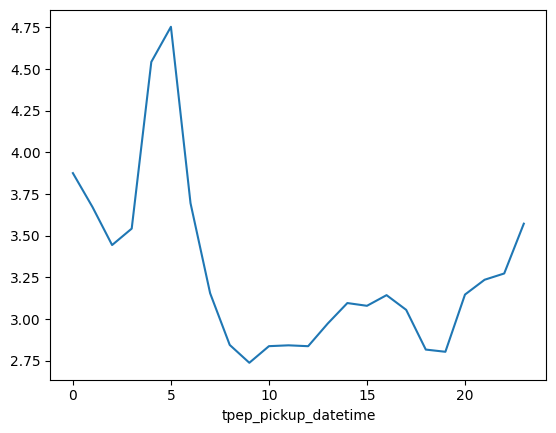

In [94]:
df.groupby(df['tpep_pickup_datetime'].dt.hour)['trip_distance'].mean().plot.line()

In [97]:
import numpy as np
df['whatever'] = np.nan

In [98]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,whatever
0,2.0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,1.0,N,193,193,1.0,2.5,0.5,0.5,1.14,0.00,0.3,4.94,0.0,NaN
1,2.0,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,1.0,N,234,25,2.0,16.5,0.5,0.5,0.00,0.00,0.3,20.30,2.5,NaN
2,1.0,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,2.0,N,132,42,1.0,52.0,0.0,0.5,11.75,6.12,0.3,70.67,0.0,NaN
3,2.0,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,2.0,N,132,142,1.0,52.0,0.0,0.5,11.06,0.00,0.3,66.36,2.5,NaN
4,1.0,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,1.0,N,107,114,1.0,9.5,3.0,0.5,2.00,0.00,0.3,15.30,2.5,NaN


In [99]:
df.dtypes

VendorID                       float64
tpep_pickup_datetime     datetime64[s]
tpep_dropoff_datetime    datetime64[s]
passenger_count                float64
trip_distance                  float64
RatecodeID                     float64
store_and_fwd_flag              object
PULocationID                     int64
DOLocationID                     int64
payment_type                   float64
fare_amount                    float64
extra                          float64
mta_tax                        float64
tip_amount                     float64
tolls_amount                   float64
improvement_surcharge          float64
total_amount                   float64
congestion_surcharge           float64
whatever                       float64
dtype: object